<a href="https://colab.research.google.com/github/yerrapothuneeraj2002/Google_Play_Store_Apps_Dataset/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


   #### DESCRIPTION




My purpose of choosing this project is to gather and analyze detailed information on apps in the Google Play Store 
in order to draw actionable insights on app features and the current state of the Android app market.



Google Play, formerly Android Market, is a digital distribution service operated and developed by Google. It serves as the official app store for certified devices running on the Android operating system, allowing users to browse and download applications developed with the Android software development kit (SDK) and published through Google.


The Google Play Store is the largest and most popular Android app store. 
The play store apps data has enormous potential to drive app-making business to sucess. 
The app market is growing with a dynamic speed and is ever changing.
The dataset for this project was found on Kaggle, and the information was collected through web scraping around 10,000 Play Store apps. 
Each app has values for category, rating, size, installs, type, price, content rating, genres, last updated, 
current version and android version. 
Python progrmming language is used in the analysis.
By studying the given data it will be possible to find out the kind of apps that are doing well and why.
Also to findout the kind of apps that can be launched in future depending on the market and competition.




- Performing data cleaning and preparation using numpy and pandas
- Perform Univaviate , Bivariate and Multivariate analysis to find out some insights from the data
- Conclusions and assumptions and suggestions where required.
- Summarize my inferences and write a conclusion.

In [3]:
# importing the important libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# importing the csv file using pandas

df = pd.read_csv("/content/drive/MyDrive/EDA Project/googleplaystore.csv")

In [5]:
# displaying the first five columns

df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [6]:
# displaying the last five columns

df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,25-Jul-17,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,6-Jul-18,1,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,20-Jan-17,1,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,19-Jan-15,Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,25-Jul-18,Varies with device,Varies with device


In [7]:
# displaying the information of the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [8]:
# displaying the number of rows and columns

df.shape

(10841, 13)

In [9]:
# describing the statistical summary of the data

df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [10]:
# checking the null values in each column
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

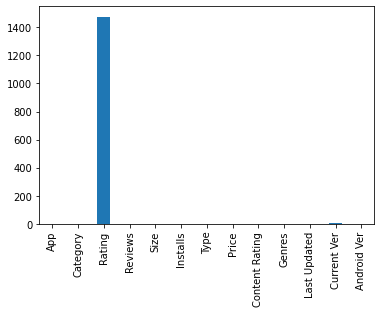

In [11]:
# checking the null values in a graphical representation

df.isnull().sum().plot.bar()
plt.show()

DATA CLEANING

Since there is only one missing value in Type column, So, let’s fill the missing value. 
After cross-checking in the play store the missing value is found to be Free 
So now we can fill the missing value with free

In [12]:
df['Type'].fillna("Free", inplace = True)

In [13]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Now, we can move on to the column Content Rating

In [14]:
df[df['Content Rating'].isnull()]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,11-Feb-18,1.0.19,4.0 and up,NaN


By, looking only at these rows it is not easy to say what's actually missing in this row. 
let us have a look at all of its near rows data. For this purpose, we have iloc and loc function.

In [15]:
df.loc[10468:10477, :]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10468,Tassa.fi Finland,LIFESTYLE,3.6,346,7.5M,"50,000+",Free,0,Everyone,Lifestyle,22-May-18,5.5,4.0 and up
10469,TownWiFi | Wi-Fi Everywhere,COMMUNICATION,3.9,2372,58M,"500,000+",Free,0,Everyone,Communication,2-Aug-18,4.2.1,4.2 and up
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,10-Feb-17,0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,5-Aug-14,3.0.0,4.0.3 and up
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,11-Feb-18,1.0.19,4.0 and up,NaN
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,7-Aug-18,6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,21-Nov-14,2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,17-May-17,0.0.9,2.3 and up
10476,Lennox iComfort Wi-Fi,LIFESTYLE,3.0,552,7.6M,"50,000+",Free,0,Everyone,Lifestyle,22-Mar-17,2.0.15,2.3.3 and up
10477,Sci-Fi Sounds and Ringtones,PERSONALIZATION,3.6,128,11M,"10,000+",Free,0,Everyone,Personalization,27-Sep-17,4,4.0 and up


We can clearly see that row 10472 has missing data for the Categorycolumn and 
all the prevailing column values are being replaced with its previous column. 
A better idea will be to drop this row from our data frame.



In [16]:
df.dropna(subset = ['Content Rating'], inplace=True)


We are having some of the unwanted columns which will be of not much use in the analysis process. So let’s drop those columns.

In [17]:
df.drop(['Current Ver','Last Updated', 'Android Ver'], axis=1, inplace=True)


Now, we can fix the Rating column which contains a total of 1474 of missing values. Replacing the missing values with the Modevalue of that entire column.

In [18]:
modeValueRating = df['Rating'].mode()


In [19]:
df['Rating'].fillna(value=modeValueRating[0], inplace = True)


Finally, after fixing all the missing values, we should have a look at our data frame, We defined a function as printinfo().
So, it’s time to use that function.

In [20]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
dtype: int64

All the columns have the null_count as zero, which indicates that now the data frame doesn’t contain any missing values.

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  object 
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
dtypes: float64(1), object(9)
memory usage: 931.6+ KB


Starting with the column Reviews , converting its type to int .

In [22]:
df['Reviews'] = df.Reviews.astype(int)


Now, the reviews column has been converted to int type, so now we can move to the Column: Size
Converting the Size Column from object to integer, but this column contains some of the special characters like , , + , M , K & also it has a some of the value as Varies with device . We need to remove all of these and then convert it to int or float .


Removing the +Symbol:

In [23]:
df['Size'] = df.Size.apply(lambda x: x.strip('+'))

Removing the , symbol:

In [24]:
df['Size'] =  df.Size.apply(lambda x: x.replace(',', ''))

Replacing the M symbol by multiplying the value with 1000000:

In [25]:
df['Size'] = df.Size.apply(lambda x: x.replace('M', 'e+6'))


Replacing the k by multiplying the value with 1000:

In [26]:
df['Size'] = df.Size.apply(lambda x: x.replace('k', 'e+3'))

Replacing the Varies with device value with Nan :

In [27]:
df['Size'] = df.Size.replace('Varies with device', np.NaN)


Now, finally converting all these values to numeric type:

In [28]:
df['Size'] = pd.to_numeric(df['Size'])

So, after performing all of these operations, we should have a detailed look at that column, 
so yes again we will call our useful function which we defined.

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 931.6+ KB


Since we converted the Varies with device value to Nan , so we have to do something with those set of Nan values data. It will be a better idea to drop the Rows of the column Size having Nanvalues because it will be not an efficient idea to replace those values with mean or mode since the size of some apps would be too large and some of them too small.



In [30]:
df.dropna(subset = ['Size'], inplace=True)


Column: Installs :
To convert this column from object to integer type. First of all, we will need to remove the +symbol from these values.

In [31]:
df['Installs'] = df.Installs.apply(lambda x: x.strip('+'))

and then let’s remove the , symbol from the numbers.

In [32]:
df['Installs'] = df.Installs.apply(lambda x: x.replace(',', ''))

Lastly, we can now convert it from string type to numeric type, and then have a look at our dataset.

In [33]:
df['Installs'] = pd.to_numeric(df['Installs'])


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9145 entries, 0 to 10840
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9145 non-null   object 
 1   Category        9145 non-null   object 
 2   Rating          9145 non-null   float64
 3   Reviews         9145 non-null   int64  
 4   Size            9145 non-null   float64
 5   Installs        9145 non-null   int64  
 6   Type            9145 non-null   object 
 7   Price           9145 non-null   object 
 8   Content Rating  9145 non-null   object 
 9   Genres          9145 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 785.9+ KB


So, now we are only left with the Price column.
Column: Price :
Converting this column from object to Numeric type.

In [35]:
df['Price'].value_counts()


0           8421
$0.99        145
$2.99        114
$1.99         66
$4.99         65
            ... 
$389.99        1
$19.90         1
$1.75          1
$14.00         1
$1.04          1
Name: Price, Length: 87, dtype: int64

The values contain a special symbol $ which can be removed and then converted to the numeric type.

In [36]:
df['Price'] = df.Price.apply(lambda x: x.strip('$'))

In [37]:
df['Price'] = pd.to_numeric(df['Price'])

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9145 entries, 0 to 10840
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9145 non-null   object 
 1   Category        9145 non-null   object 
 2   Rating          9145 non-null   float64
 3   Reviews         9145 non-null   int64  
 4   Size            9145 non-null   float64
 5   Installs        9145 non-null   int64  
 6   Type            9145 non-null   object 
 7   Price           9145 non-null   float64
 8   Content Rating  9145 non-null   object 
 9   Genres          9145 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 785.9+ KB


Now, we are finally done. In this section Data Preparation and Cleaning. We can see that the original dataset contained 10841 Rows and 13 Columns. It contained App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Curernt Ver, and Android VerColumns. But after cleansing the dataset and dropping the unwanted rows and columns having Null Values and Garbage data from the data frame, we are left with 8434 Rows and 10 Columns.

## UNIVARIATE ANALYSIS

Top categories on Google Playstore?
Category 

In [39]:
# Category value counts
df.Category.value_counts()

FAMILY                 1832
GAME                   1015
TOOLS                   739
MEDICAL                 434
BUSINESS                400
PERSONALIZATION         355
LIFESTYLE               345
SPORTS                  311
FINANCE                 307
PRODUCTIVITY            303
COMMUNICATION           265
HEALTH_AND_FITNESS      264
PHOTOGRAPHY             254
NEWS_AND_MAGAZINES      216
DATING                  212
SOCIAL                  210
SHOPPING                201
BOOKS_AND_REFERENCE     197
TRAVEL_AND_LOCAL        192
VIDEO_PLAYERS           131
EDUCATION               111
MAPS_AND_NAVIGATION     108
FOOD_AND_DRINK          100
ENTERTAINMENT            90
LIBRARIES_AND_DEMO       82
AUTO_AND_VEHICLES        75
HOUSE_AND_HOME           68
ART_AND_DESIGN           62
EVENTS                   57
WEATHER                  57
PARENTING                54
COMICS                   51
BEAUTY                   47
Name: Category, dtype: int64

In [40]:
# percentages of Category value counts
df.Category.value_counts(normalize=True)

FAMILY                 0.200328
GAME                   0.110990
TOOLS                  0.080809
MEDICAL                0.047458
BUSINESS               0.043740
PERSONALIZATION        0.038819
LIFESTYLE              0.037726
SPORTS                 0.034008
FINANCE                0.033570
PRODUCTIVITY           0.033133
COMMUNICATION          0.028978
HEALTH_AND_FITNESS     0.028868
PHOTOGRAPHY            0.027775
NEWS_AND_MAGAZINES     0.023619
DATING                 0.023182
SOCIAL                 0.022963
SHOPPING               0.021979
BOOKS_AND_REFERENCE    0.021542
TRAVEL_AND_LOCAL       0.020995
VIDEO_PLAYERS          0.014325
EDUCATION              0.012138
MAPS_AND_NAVIGATION    0.011810
FOOD_AND_DRINK         0.010935
ENTERTAINMENT          0.009841
LIBRARIES_AND_DEMO     0.008967
AUTO_AND_VEHICLES      0.008201
HOUSE_AND_HOME         0.007436
ART_AND_DESIGN         0.006780
EVENTS                 0.006233
WEATHER                0.006233
PARENTING              0.005905
COMICS  

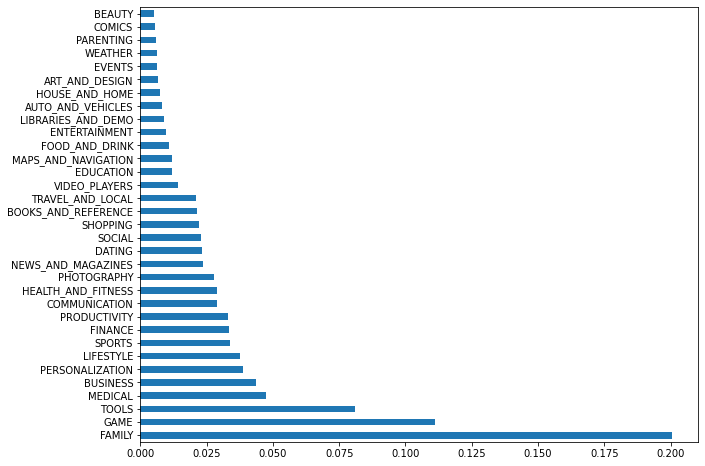

In [41]:
# bar graph representation of Category value counts

plt.figure(figsize=(10,8))

df.Category.value_counts(normalize=True).plot.barh()
plt.show()

So there are all total of 33 categories in the dataset from the above output we can come to the conclusion that in the play store most of the apps are under Family & Game category and least are of Beauty & Comics Category.

*Top content rating category on Google Playstore?*
Rating


In [42]:
# Content Rating value counts
df["Content Rating"].value_counts()

Everyone           7416
Teen                987
Mature 17+          406
Everyone 10+        332
Adults only 18+       2
Unrated               2
Name: Content Rating, dtype: int64

In [43]:
# percentages of Content Rating value counts
df["Content Rating"].value_counts(normalize=True)

Everyone           0.810935
Teen               0.107928
Mature 17+         0.044396
Everyone 10+       0.036304
Adults only 18+    0.000219
Unrated            0.000219
Name: Content Rating, dtype: float64

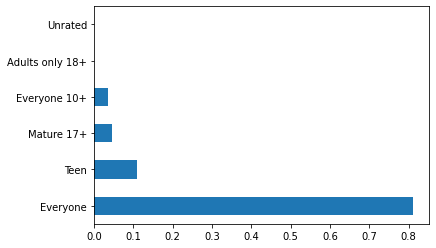

In [44]:
# bar graph representation of Category value counts


df["Content Rating"].value_counts(normalize=True).plot.barh()
plt.show()

From the above plot, we can see that the Everyone category of Apps from the ‘Content Rating’ column is found more on the play store.

Distribution of ratings on Google Playstore?*


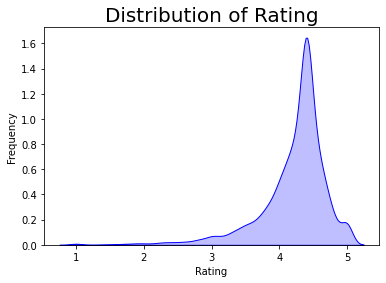

In [45]:

plt.xlabel("Rating")
plt.ylabel("Frequency")
graph = sns.kdeplot(df.Rating, color="Blue", shade = True)
plt.title('Distribution of Rating',size = 20);

From the above graph, we can come to the conclusion that most of the apps in the google play store are rated between 3.5 to 4.8.

The portion of the apps in the play store are paid and free.
Type

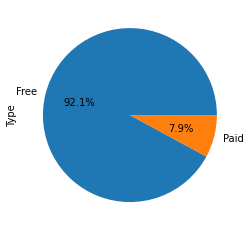

In [46]:
df.Type.value_counts(normalize=True).plot.pie(autopct='%1.1f%%')
plt.show()

From the above graph, we can see that 92%(Approx.) of apps in the google play store are free and 8%(Approx.) are paid.

Price

In [47]:
demo = df.sort_values(by=['Price'], ascending=False)
abc = demo.head(5)
abc


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300000.0,10000,Paid,400.00,Everyone,Lifestyle
5354,I am Rich Plus,FAMILY,4.0,856,8700000.0,10000,Paid,399.99,Everyone,Entertainment
5358,I am Rich!,FINANCE,3.8,93,22000000.0,1000,Paid,399.99,Everyone,Finance
5369,I am Rich,FINANCE,4.3,180,3800000.0,5000,Paid,399.99,Everyone,Finance
5373,I AM RICH PRO PLUS,FINANCE,4.0,36,41000000.0,1000,Paid,399.99,Everyone,Finance


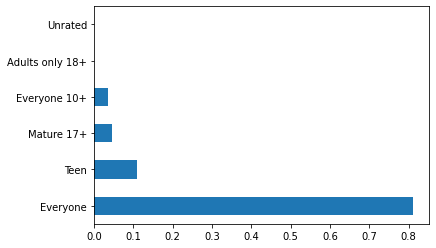

In [48]:
df["Content Rating"].value_counts(normalize=True).plot.barh()
plt.show()

## Bi-Variate analysis

Category vs Installs

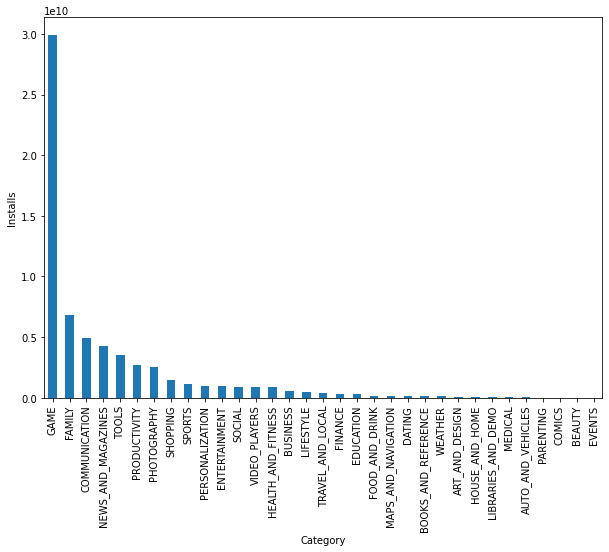

In [49]:
plt.figure(figsize=(10,7))


plt.xlabel("Category")
plt.ylabel("Installs")

df.groupby(['Category'])['Installs'].sum().sort_values(ascending=False).plot.bar()
plt.show()

From the above visualization, it can be interpreted that the top categories with the highest installs are Game, Family, Communication, News & Magazines, & Tools.

Reviews vs Apps

In [50]:
Highest_rev = df.sort_values(by='Reviews', ascending=False).head(15)
Highest_rev

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
1879,Clash of Clans,GAME,4.6,44893888,98000000.0,100000000,Free,0.0,Everyone 10+,Strategy
1704,Clash of Clans,GAME,4.6,44891723,98000000.0,100000000,Free,0.0,Everyone 10+,Strategy
1670,Clash of Clans,GAME,4.6,44891723,98000000.0,100000000,Free,0.0,Everyone 10+,Strategy
3986,Clash of Clans,FAMILY,4.6,44881447,98000000.0,100000000,Free,0.0,Everyone 10+,Strategy
1872,Subway Surfers,GAME,4.5,27725352,76000000.0,1000000000,Free,0.0,Everyone 10+,Arcade
1917,Subway Surfers,GAME,4.5,27725352,76000000.0,1000000000,Free,0.0,Everyone 10+,Arcade
1750,Subway Surfers,GAME,4.5,27724094,76000000.0,1000000000,Free,0.0,Everyone 10+,Arcade
1700,Subway Surfers,GAME,4.5,27723193,76000000.0,1000000000,Free,0.0,Everyone 10+,Arcade
1654,Subway Surfers,GAME,4.5,27722264,76000000.0,1000000000,Free,0.0,Everyone 10+,Arcade
3896,Subway Surfers,GAME,4.5,27711703,76000000.0,1000000000,Free,0.0,Everyone 10+,Arcade


From the above dataframe we can interprete, and come to conculsion that the Apps like Clash of Clans, Subway Surfers, Clash Royale, and Candy Crush Saga has the highest number of reviews on google playstore.

Category vs Installs

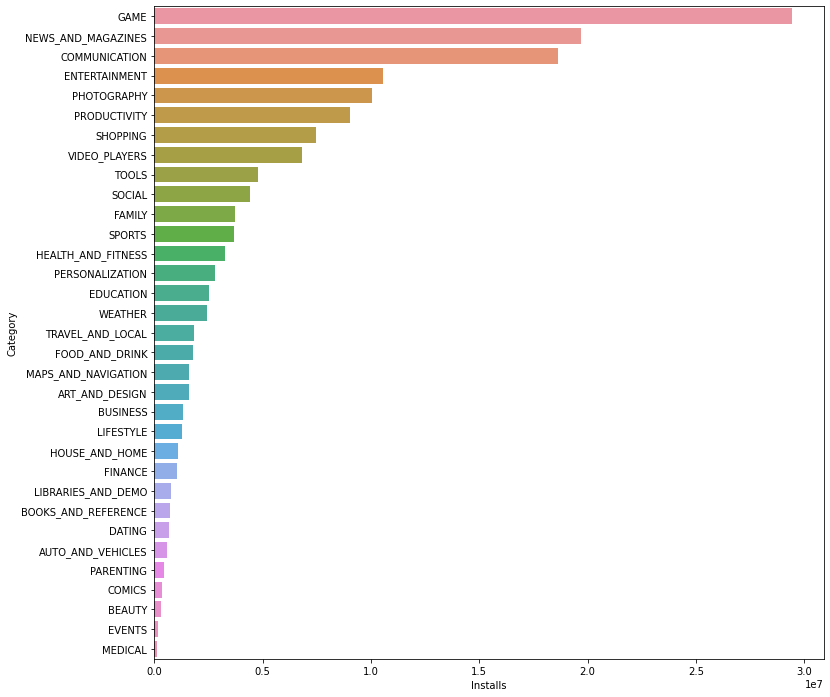

In [51]:
plt.figure(figsize=(12,12))
mean_ints = df.groupby(['Category'])['Installs'].mean().sort_values(ascending=False)
sns.barplot(x=mean_ints, y=mean_ints.index, data=df)

From the above output we can infer that, games, news and magazines, communication and education has the highest installs and medcal, events, beauty and comics has the least installs.

Category vs Type

Category           Type
ART_AND_DESIGN     Free     59
                   Paid      3
AUTO_AND_VEHICLES  Free     73
                   Paid      2
BEAUTY             Free     47
                          ... 
TRAVEL_AND_LOCAL   Paid     10
VIDEO_PLAYERS      Free    130
                   Paid      1
WEATHER            Free     51
                   Paid      6
Name: Type, Length: 63, dtype: int64


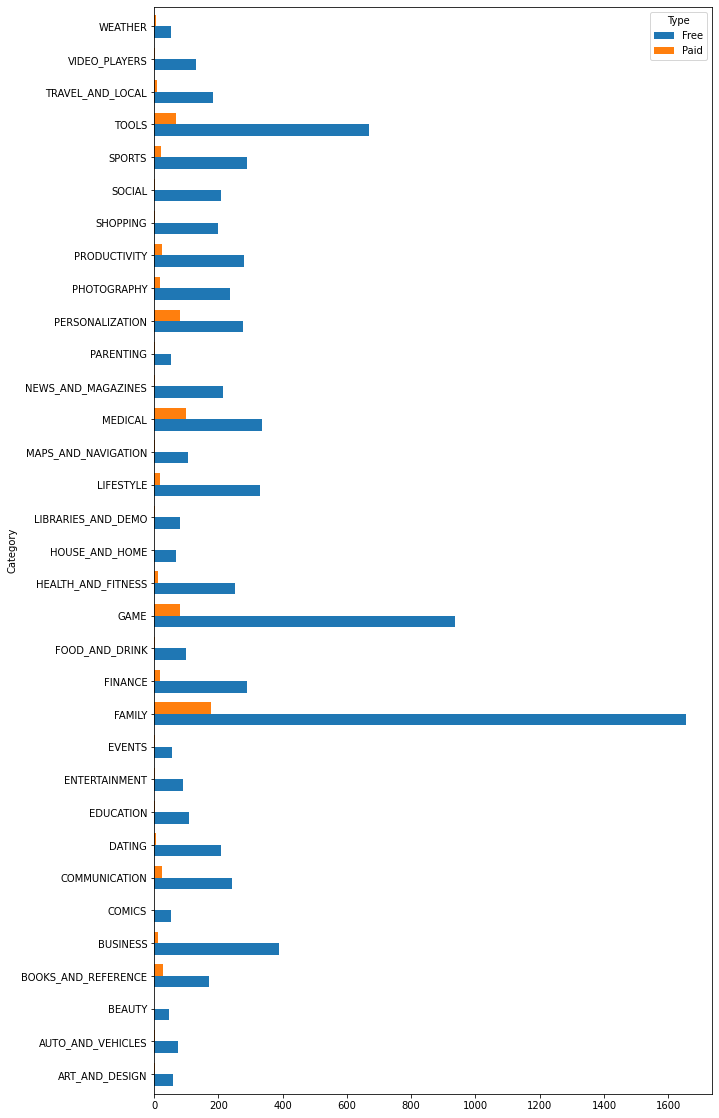

In [52]:
print(df.groupby('Category')['Type'].value_counts())
Type_cat = df.groupby('Category')['Type'].value_counts().unstack().plot.barh(figsize=(10,20), width=0.7)
plt.show()

So again, family category has the most free and paid app on the google play store. We can see social app is always free, like entertainment, event, education, comic, and more.

The medical has a high amount of paid app considering quantity of medical app is not much.

Multivariate

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


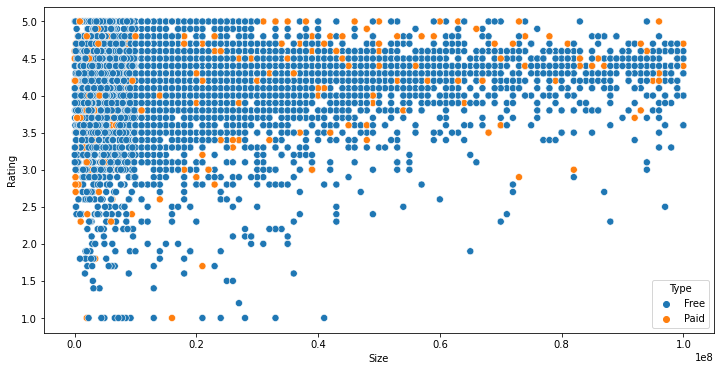

In [53]:
# show the distribution of apps in term of their rating, size and type

plt.figure(figsize=(12, 6))
sns.scatterplot(df['Size'],
               df['Rating'],
               hue=df['Type'],
               s=50)

From this scatter plot, we can imply that majority of the free apps are small in size and having high rating. While for paid apps, we have quite equal distribution in term on size and rating.

In [54]:
# correlation
df.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.068608,0.054812,0.041273,-0.018146
Reviews,0.068608,1.000000,0.238215,0.627720,-0.009839
Size,0.054812,0.238215,1.000000,0.164787,-0.023006
Installs,0.041273,0.627720,0.164787,1.000000,-0.010481
Price,-0.018146,-0.009839,-0.023006,-0.010481,1.000000


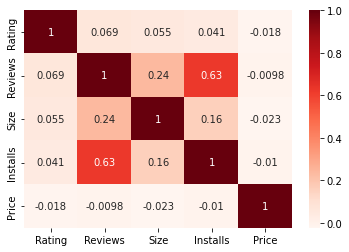

In [55]:
#Corelation matrix

sns.heatmap(df.corr(), annot=True, cmap="Reds")

REVIEWS AND INSTALLS ARE HIGHLY CORELATED WITH 0.63

Pairplot between all the possible columns

In [56]:
?sns.pairplot

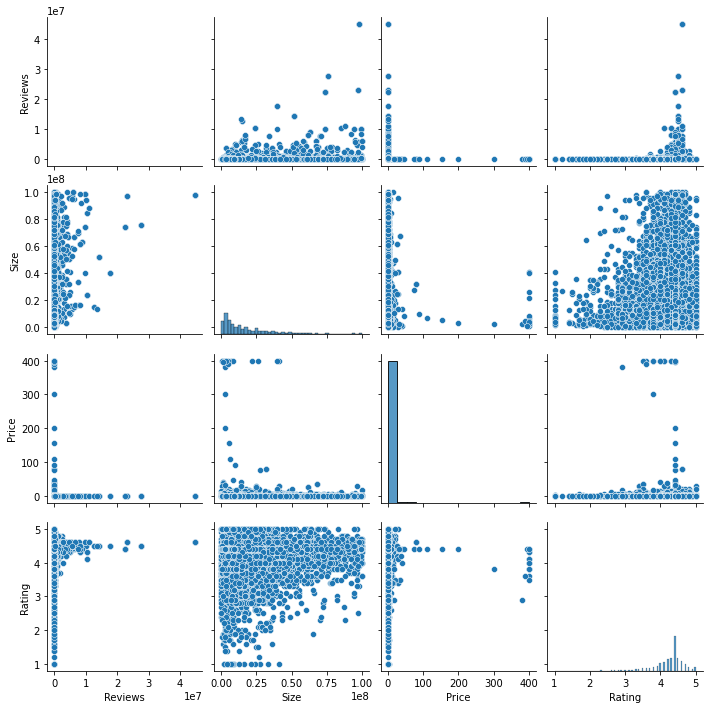

In [57]:
sns.pairplot(df[['Reviews', 'Size', 'Price','Rating']])
plt.show()

Type column

In [58]:
df['Type'].describe()

count     9145
unique       2
top       Free
freq      8421
Name: Type, dtype: object

Price column

In [59]:
df['Price'].describe()

count    9145.000000
mean        1.184366
std        17.355754
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

Rating column

In [60]:
df['Rating'].describe()

count    9145.000000
mean        4.208868
std         0.507267
min         1.000000
25%         4.100000
50%         4.400000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

### Inferences and Conclusion



After Analyzing the dataset we have got answers to some of the serious & interesting questions which any of the android users would love to know.

Top categories on Google Playstore?
Which category of Content is found more?
What percentage of apps are Free and Paid?
Count of Apps found in different genres?
Distribution of the ratings of the apps?
Which are the top 5 expensive Apps?
Which are the Apps with the highest number of reviews?
Which category of apps has the most number of installs?
Count of Free and Paid apps in each category?
